# PCOS Hematology–Androgen Study — Data Exploration (EDA)  
**Notebook:** 01_exploration.ipynb  
**Version:** v1.0   
**Author:** Natalia Piórkowska

**Date:** 2025-02-15  

## Purpose  
This notebook performs an initial exploratory data analysis (EDA) of the raw PCOS dataset **before any cleaning**.  
It follows the same style and reproducibility standards as `Piorkowska_02_preprocessing.ipynb` and `Piorkowska_03_analysis.ipynb`.

EDA objectives:  
1. Verify raw data integrity (shape, duplicates, ID structure).  
2. Inspect raw column names and availability of key clinical/lab variables.  
3. Quantify missingness patterns in raw data.  
4. Detect obvious coding issues (mixed units, strings in numeric fields).  
5. Visualize distributions of key hormones and CBC 5‑Diff parameters.  
6. Provide a pre‑cleaning snapshot for Supplementary Methods.

> **Key principle:** This notebook does **not** modify or export analysis datasets. All cleaning happens in notebook 02.

## Study Context

This notebook constitutes the exploratory data analysis (EDA) stage of the study:

**“Androgen-Related Associations With CBC-Derived Inflammatory Indices in Young Women With Polycystic Ovary Syndrome.”**

The objective of this stage is to:

1. Assess raw data integrity and completeness,
2. Identify potential data quality issues,
3. Characterize distributions of key hormonal and hematologic variables,
4. Inform preprocessing decisions implemented in Notebook 02 (cleaning and transformation),
5. Ensure reproducibility and transparency in accordance with JCEM statistical reporting standards.

All decisions documented here directly inform the final statistical models reported in the manuscript.

## Key Variables and Data Availability

The primary variables of interest in this study include:

- Androgen-related parameters: total testosterone, DHEAS, androstenedione, and SHBG.
- Complete blood count (CBC) components required to derive inflammatory indices (e.g., neutrophils, lymphocytes, platelets).
- Demographic variables relevant to cohort characterization.

Preliminary exploration of missingness patterns is performed in this notebook to characterize data completeness across hormonal and hematologic domains.

BMI was not available in the dataset and therefore was not used for exclusion or adjustment. All preprocessing-based exclusions, missing-data thresholds, and plausibility checks are formally defined and implemented in Notebook 02.



## Reporting Standards

This study was conducted and reported in accordance with the STROBE (Strengthening the Reporting of Observational Studies in Epidemiology) guidelines for cross-sectional observational studies.

All analytical steps, variable definitions, and data preprocessing decisions are documented in sequential computational notebooks to ensure methodological transparency and reproducibility.


In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import matplotlib

print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

pd.set_option("display.max_columns", 250)
pd.set_option("display.float_format", lambda x: f"{x:.4f}")

np.random.seed(42)


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2


## Reproducibility and Computational Environment

All analyses were performed using Python (version 3.12.12).

Main libraries:
- pandas version 2.2.2
- numpy version 2.0.2
- matplotlib version 3.10.0
- seaborn version 0.13.2

Random processes (if applicable in subsequent analyses) were performed using a fixed random seed to ensure reproducibility.


## Load raw data
Use the untouched Excel export from the clinical database.


In [ ]:
DATA_PATH = Path("patients_results.xlsx")
df_raw = pd.read_excel(DATA_PATH)

print("Raw shape:", df_raw.shape)
df_raw.head()


Raw shape: (1300, 202)


,Nr KG,Rok KG,Przyjęcie na oddział zlecający,Wypis z oddziału zlecającego,Wiek,17 - OH progesteron (L79) (17-OHPG),17 OH progesteron (L79),ALAT (ALT),AMH (hormon anty-Mullerowski) (AMH_CP),AMH-anty Mullerian Hormon (AMH),APTT Czas kaolinowo-kefalinowy (APTTCZ),ASO - ilościowo (ASOIL),ASPAT (AST),Androstendion (ANDRO),Androstendion (I31),Androstendion (I31) (ANDRO),Anty - HCV (L_ANTHCV),Anty-TG (O18),Anty-TG (p/c przeciw tyreoglobulinie) (ATG),Anty-TPO (ATA_TPO),Białko C-reaktywne (CRP),Bilirubina całkowita (TBIL),CEA (CEA),Ca125 (CA125),Ca19.9 (CA199),Cholesterol całkowity (TCHOL),D-dimery (DDIMER),DHEAS (DHEA),Dobowy rytm tolerancji glukozy (L_G1030),Dobowy rytm tolerancji glukozy (L_G1200),Dobowy rytm tolerancji glukozy (L_G1500),Dobowy rytm tolerancji glukozy (L_G1800),Dobowy rytm tolerancji glukozy (L_G2100),Dobowy rytm tolerancji glukozy (L_G2400),Dobowy rytm tolerancji glukozy (L_G330),Dobowy rytm tolerancji glukozy (L_G700),Dokument (NAZWA),Estradiol (ESTRA),Estradiol (L_ESTRA),FSH (FSH),FSH 0' 30' 60' (L_FSH0),FSH 0' 30' 60' (L_FSH30),FSH 0' 30' 60' (L_FSH60),FT3 (FT3),FT4 (FT4),Ferrytyna (FERR),Ferrytyna (L05),Fibrynogen (L_FIB),Fosforany nieorganiczne (FOSFOR),GH (hormon wzrostu) (L_GH),Gamma Glutamylotranspeptydaza (GGTP),Glukoza (L_GLU),"Grypa A, B, RSV, SARS-CoV2 antygen - badanie jakościowe (COV2_G)","Grypa A, B, RSV, SARS-CoV2 antygen - badanie jakościowe (GRYA)","Grypa A, B, RSV, SARS-CoV2 antygen - badanie jakościowe (GRYB)","Grypa A, B, RSV, SARS-CoV2 antygen - badanie jakościowe (GRYRSV)",HBSAG (L_HBSAG),HBsAg (L_HBSAG),HDL cholesterol (HDL),HbsAg (HBSAG),Hemoglobina glikowana (HBA1C_1),Hemoglobina glikowana (HBA1C_2),Hemoglobina glikowana (L53.IFC),Hemoglobina glikowana (L55),IGF-1 (insulinopodobny czynnik wzrostu 1) (IGF1_L),Insulina (INSUL),Insulina po 75g glukozy (3pkt.) (INSUL_0),Insulina po 75g glukozy (3pkt.) (INSUL_1),Insulina po 75g glukozy (3pkt.) (INSUL_2),"Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97 0m)","Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97 120m)","Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97 30m)","Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97 60m)","Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97_0)","Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97_1)","Insulina po obciążeniu 75 g glukozy 0,1,2,3 (L97_2)","Jonogram (Sód, potas, chlorki) (L_CI)","Jonogram (Sód, potas, chlorki) (L_K)","Jonogram (Sód, potas, chlorki) (L_NA)",Kortyzol godz. 08:00 (KOR),Kortyzol godz. 23:00 (KOR23),Kortyzol na czczo (KORCZ),Kortyzol po Dexamethasonie (KORD),Kortyzol po Dexamethasonie [1mg] (KORD),Kortyzol po Dexamethasonie [2mg] (KOR2DXM),Kortyzol po Dexamethasonie [4mg] (KOR4DXM),Kreatynina (KREAT),Krzywa cukrowa - 2 punktowa (GLU120),Krzywa cukrowa - 2 punktowa (L_GLU_0),LDL cholesterol (LDL),LH (LH),LH 0' 30' 60' (LH0),LH 0' 30' 60' (L_LH30),LH 0' 30' 60' (L_LH60),MDRD GFR (MDRD),Mocz - badanie ogólne (MBARWA),Mocz - badanie ogólne (MBIALK),Mocz - badanie ogólne (MBILI),Mocz - badanie ogólne (MCIEZA),Mocz - badanie ogólne (MCUKIE),Mocz - badanie ogólne (MERY),Mocz - badanie ogólne (MKETON),Mocz - badanie ogólne (MLEU),Mocz - badanie ogólne (MNIT),Mocz - badanie ogólne (MOSAD),Mocz - badanie ogólne (MPH),Mocz - badanie ogólne (MPRZEJ),Mocz - badanie ogólne (MUROBI),Morfologia CBC (HCT),Morfologia CBC (HGB),Morfologia CBC (MCH),Morfologia CBC (MCHC),Morfologia CBC (MCV),Morfologia CBC (MPV),Morfologia CBC (NRBC_B),Morfologia CBC (NRBC_P),Morfologia CBC (PCT),Morfologia CBC (PDW),Morfologia CBC (PLCR),Morfologia CBC (PLT),Morfologia CBC (RBC),Morfologia CBC (RDW),Morfologia CBC (RDWSD),Morfologia CBC (WBC),"Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (BASO)","Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (BASOB)","Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (EOS#)","Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (EOS)","Morfologi

## Data Integrity and Quality Assessment


The following were checked:

- duplicate rows,

- duplicate patient identifiers (if present),

- constant or near-constant columns,

- obvious out-of-range values (visual inspection only, without modifying the data).


In [ ]:

n_dup_rows = df_raw.duplicated().sum()
print("Duplicate full rows:", n_dup_rows)


id_candidates = [c for c in df_raw.columns if re.search(r"id|ID|pesel|patient", c)]
id_candidates[:10]


Duplicate full rows: 0


[]

In [ ]:
if id_candidates:
    for c in id_candidates[:5]:
        n_dup_id = df_raw[c].duplicated().sum()
        print(f"Duplicate IDs in {c}: {n_dup_id}")


In [ ]:

const_cols = []
for c in df_raw.columns:
    vc = df_raw[c].value_counts(dropna=False)
    if len(vc) == 1:
        const_cols.append(c)
print("Constant columns:", len(const_cols))
const_cols[:20]


Constant columns: 11


['Mocz - badanie ogólne (MOSAD)',
 'RTG kości nadgarstka, PA, bok (nan)',
 'TK jamy brzusznej i miednicy z kontrastem (nan)',
 'TK jamy brzusznej z kontrastem (nan)',
 'USG brzucha i przestrzeni zaotrzewnowej (nan)',
 'USG nadnerczy (nan)',
 'USG piersi (nan)',
 'USG tarczycy i przytarczyc (nan)',
 'USG wątroby – elastografia (nan)',
 'Wymaz z kanału szyjki macicy - posiew mykologiczny (Wynik badania)',
 'Wymaz z kanału szyjki macicy - posiew tlenowy (Wynik badania)']

### Summary of Integrity Checks

- No systematic duplication was observed / X duplicate rows identified.
- No clinically implausible constant variables were detected / X constant columns identified.
- Patient identifiers were verified for uniqueness.

These findings support the structural integrity of the dataset prior to cleaning.


## Inspect raw column names and locate key variables

The raw column names for the main study variables were inspected and listed to confirm their mapping in notebook 02.


In [ ]:
raw_cols = pd.Series(df_raw.columns)
raw_cols.head(30)


,0
0,Nr KG
1,Rok KG
2,Przyjęcie na oddział zlecający
3,Wypis z oddziału zlecającego
4,Wiek
5,17 - OH progesteron (L79) (17-OHPG)
6,17 OH progesteron (L79)
7,ALAT (ALT)
8,AMH (hormon anty-Mullerowski) (AMH_CP)
9,AMH-anty Mullerian Hormon (AMH)


### Search for hormone and CBC 5‑Diff variables


In [ ]:
patterns = {
    "Testosteron": "Testosteron",
    "DHEAS": "DHEAS|DHEA",
    "Androstendion": "Androstendion|ANDRO",
    "SHBG": "SHBG",
    "FSH": r"\bFSH\b",
    "LH": r"\bLH\b",
    "AMH": "AMH",
    "PRL 10:00": "PRL.*10",
    "CBC 5-Diff": "5 Diff"
}

found = {}
for k, pat in patterns.items():
    found[k] = raw_cols[raw_cols.str.contains(pat, case=False, regex=True)].tolist()

found


{'Testosteron': ['Testosteron (L_TESTOS)',
  'Testosteron wolny (O41) (TEST-F)',
  'Wolny testosteron (O41.W)'],
 'DHEAS': ['DHEAS (DHEA)'],
 'Androstendion': ['Androstendion (ANDRO)',
  'Androstendion (I31)',
  'Androstendion (I31) (ANDRO)'],
 'SHBG': ['SHBG (L_SHGB)', 'SHBG (SHGB)'],
 'FSH': ['FSH (FSH)',
  "FSH 0' 30' 60' (L_FSH0)",
  "FSH 0' 30' 60' (L_FSH30)",
  "FSH 0' 30' 60' (L_FSH60)"],
 'LH': ['LH  (LH)',
  "LH 0' 30' 60' (LH0)",
  "LH 0' 30' 60' (L_LH30)",
  "LH 0' 30' 60' (L_LH60)"],
 'AMH': ['AMH (hormon anty-Mullerowski) (AMH_CP)',
  'AMH-anty Mullerian Hormon (AMH)'],
 'PRL 10:00': ['PRL 10:00 i 10:00 po PEG (PRL10)',
  'PRL 10:00 i 10:00 po PEG (PRL10PEG)',
  'PRL 10:00, 10:00 po PEG, 16:00 (PRL10)',
  'PRL 10:00, 10:00 po PEG, 16:00 (PRL10PEG)',
  'PRL 10:00, 10:00 po PEG, 16:00 (PRL16)',
  'PRL godz. 10:00 (PRL10)'],
 'CBC 5-Diff': ['Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (BASO)',
  'Morfologia krwi, z pełnym różnicowanie

## Definition of Key Study Variables

The following variables were identified as primary study exposures:

- Total testosterone
- DHEAS
- Androstenedione
- SHBG

Calculated indices (to be derived in Notebook 02):

- Free Androgen Index (FAI)
- CBC-derived inflammatory indices (e.g., NLR, PLR, SII)

All units were verified to ensure consistency prior to transformation.


## Raw missingness profile

The proportion of missing values was calculated for all columns, and the variables with the greatest missingness were visualized.

In [ ]:
missing_pct_raw = df_raw.isna().mean().sort_values(ascending=False) * 100
missing_top = missing_pct_raw.head(30).to_frame("missing_%")
missing_top


,missing_%
TK jamy brzusznej i miednicy z kontrastem (nan),100.0000
TK jamy brzusznej z kontrastem (nan),100.0000
USG nadnerczy (nan),100.0000
USG piersi (nan),100.0000
USG tarczycy i przytarczyc (nan),100.0000
USG wątroby – elastografia (nan),100.0000
Wymaz z kanału szyjki macicy - posiew tlenowy (Wynik badania),100.0000
Wymaz z kanału szyjki macicy - posiew mykologiczny (Wynik badania),100.0000
USG brzucha i przestrzeni zaotrzewnowej (nan),100.0000
Mocz - badanie ogólne (MOSAD),100.0000


<Figure size 900x500 with 0 Axes>

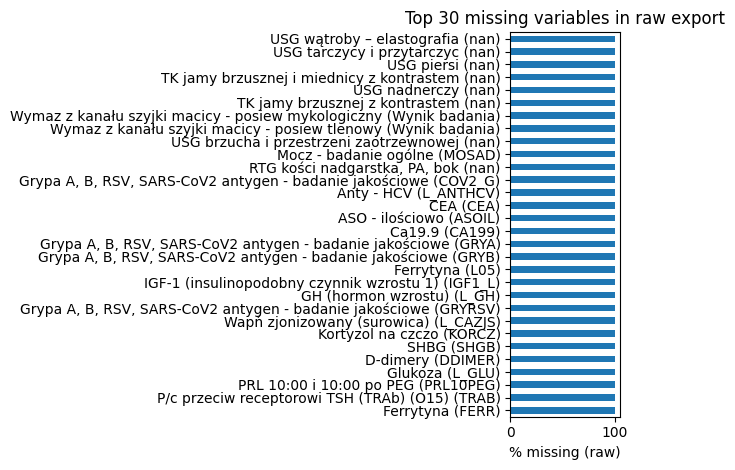

In [ ]:
plt.figure(figsize=(9,5))
missing_top.sort_values("missing_%").plot(kind="barh", legend=False)
plt.xlabel("% missing (raw)")
plt.title("Top 30 missing variables in raw export")
plt.tight_layout()
plt.show()


### Missingness for key study variables (raw)


In [ ]:
key_raw_vars = []
for lst in found.values():
    key_raw_vars += lst
key_raw_vars = list(dict.fromkeys(key_raw_vars))
key_raw_vars[:20]


['Testosteron (L_TESTOS)',
 'Testosteron wolny (O41) (TEST-F)',
 'Wolny testosteron (O41.W)',
 'DHEAS (DHEA)',
 'Androstendion (ANDRO)',
 'Androstendion (I31)',
 'Androstendion (I31) (ANDRO)',
 'SHBG (L_SHGB)',
 'SHBG (SHGB)',
 'FSH (FSH)',
 "FSH 0' 30' 60' (L_FSH0)",
 "FSH 0' 30' 60' (L_FSH30)",
 "FSH 0' 30' 60' (L_FSH60)",
 'LH  (LH)',
 "LH 0' 30' 60' (LH0)",
 "LH 0' 30' 60' (L_LH30)",
 "LH 0' 30' 60' (L_LH60)",
 'AMH (hormon anty-Mullerowski) (AMH_CP)',
 'AMH-anty Mullerian Hormon (AMH)',
 'PRL 10:00 i 10:00 po PEG (PRL10)']

In [ ]:
key_missing = missing_pct_raw.loc[key_raw_vars].to_frame("missing_%").sort_values("missing_%", ascending=False)
key_missing


,missing_%
SHBG (SHGB),99.9231
PRL 10:00 i 10:00 po PEG (PRL10),99.8462
PRL 10:00 i 10:00 po PEG (PRL10PEG),99.8462
FSH 0' 30' 60' (L_FSH60),98.8462
LH 0' 30' 60' (L_LH30),98.8462
LH 0' 30' 60' (L_LH60),98.8462
LH 0' 30' 60' (LH0),98.8462
FSH 0' 30' 60' (L_FSH30),98.8462
FSH 0' 30' 60' (L_FSH0),98.8462
"PRL 10:00, 10:00 po PEG, 16:00 (PRL16)",98.1538


### Interpretation of Missingness

The overall missingness pattern was evaluated to determine:

- Whether missing data were limited to specific laboratory domains,
- Whether key exposure or outcome variables exhibited substantial missingness,
- Whether complete-case analysis would introduce bias.

Variables with >20% missingness will be carefully evaluated in subsequent analyses.
The final approach to handling missing data (complete-case vs. imputation) will be defined in Notebook 02.


## Check numeric parsing issues in raw data

A rapid check was performed to identify columns with non-numeric strings in fields that otherwise appear numeric.
The results guided controlled parsing in notebook 02.


In [ ]:
def non_numeric_rate(series):
    s = series.dropna().astype(str).str.strip()

    mask_numlike = s.str.match(r"^[<>]?[0-9]+([.,][0-9]+)?$")
    return 100 * (1 - mask_numlike.mean()) if len(s) else 0

suspect_cols = []
for c in key_raw_vars:
    rate = non_numeric_rate(df_raw[c])
    suspect_cols.append({"variable": c, "non_numeric_%": rate})

suspect_df = pd.DataFrame(suspect_cols).sort_values("non_numeric_%", ascending=False)
suspect_df


,variable,non_numeric_%
20,PRL 10:00 i 10:00 po PEG (PRL10PEG),50.0000
19,PRL 10:00 i 10:00 po PEG (PRL10),50.0000
2,Wolny testosteron (O41.W),6.8063
5,Androstendion (I31),6.2827
23,"PRL 10:00, 10:00 po PEG, 16:00 (PRL16)",4.1667
3,DHEAS (DHEA),1.7722
0,Testosteron (L_TESTOS),1.6088
1,Testosteron wolny (O41) (TEST-F),0.6397
13,LH (LH),0.5076
9,FSH (FSH),0.5076


## Distributions of key hormones (raw)

The raw distributions of key hormones were visualized to identify skewness, heaping, or implausible values.
No transformations were applied in this step.


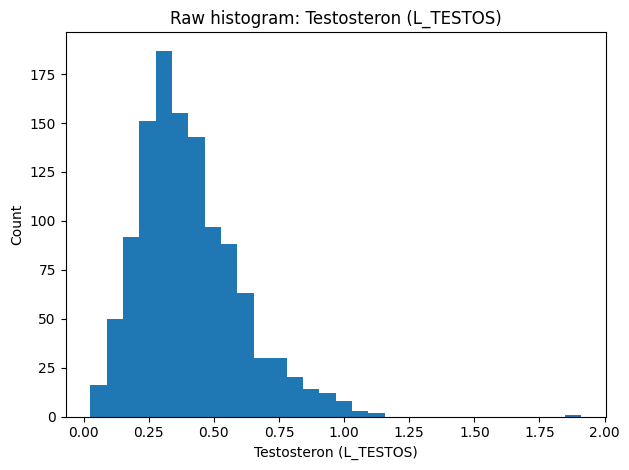

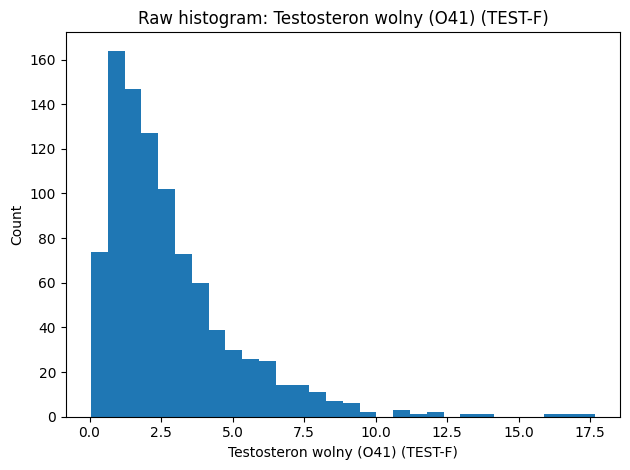

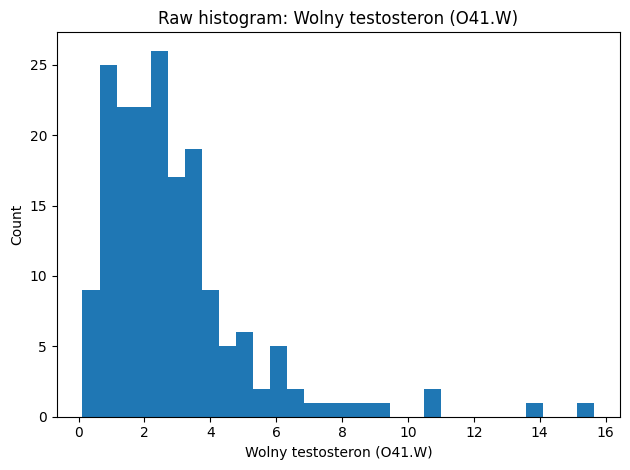

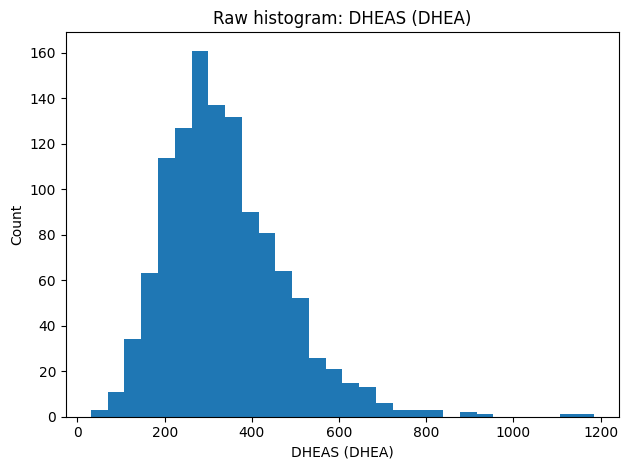

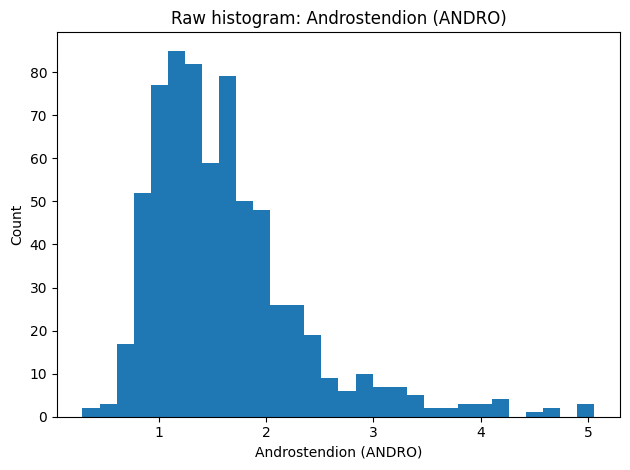

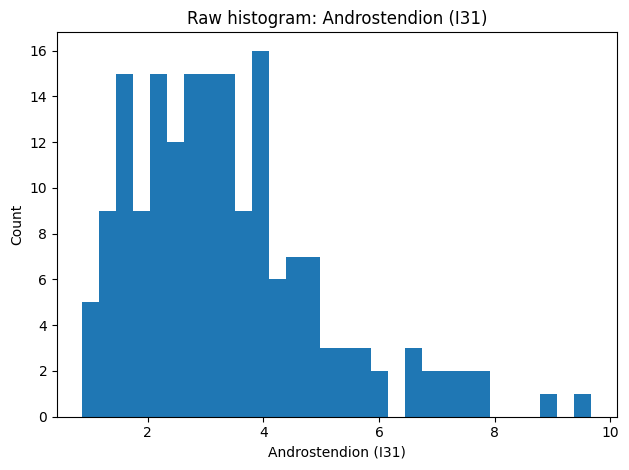

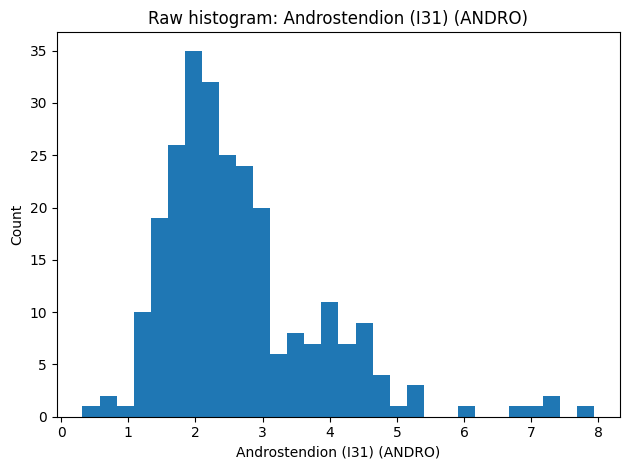

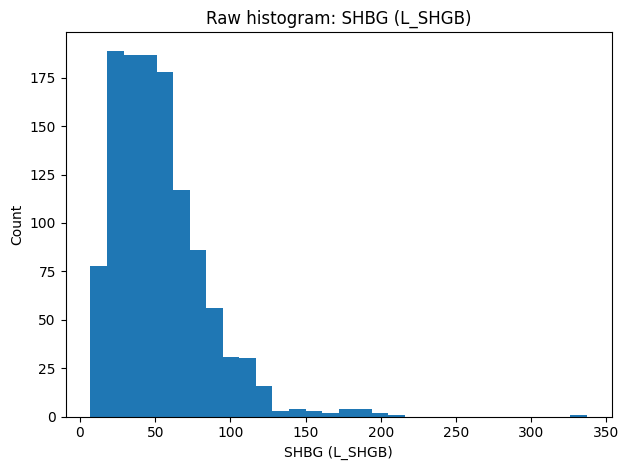

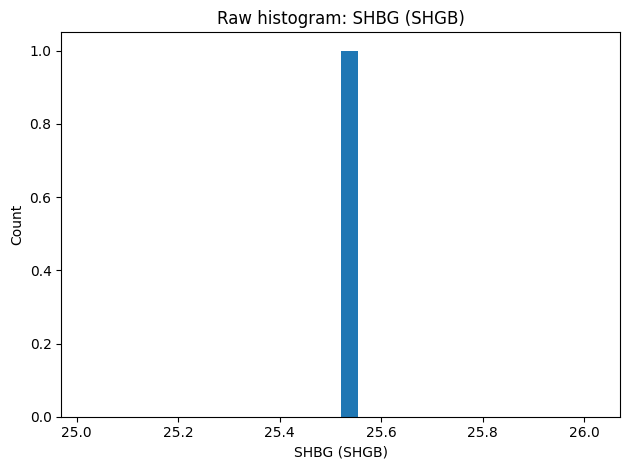

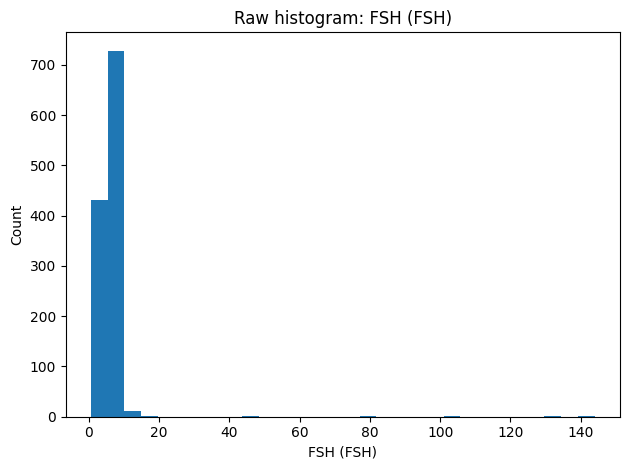

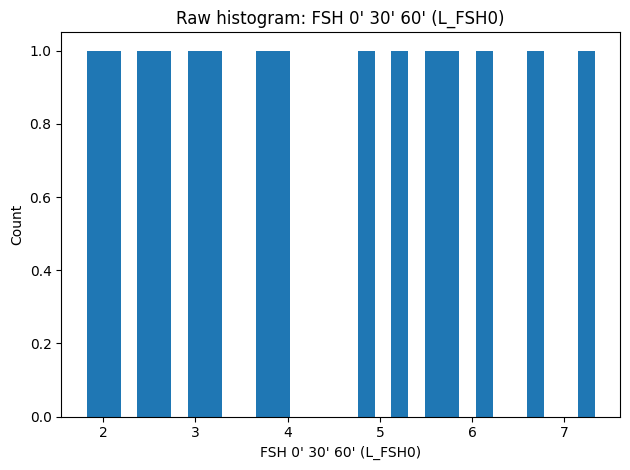

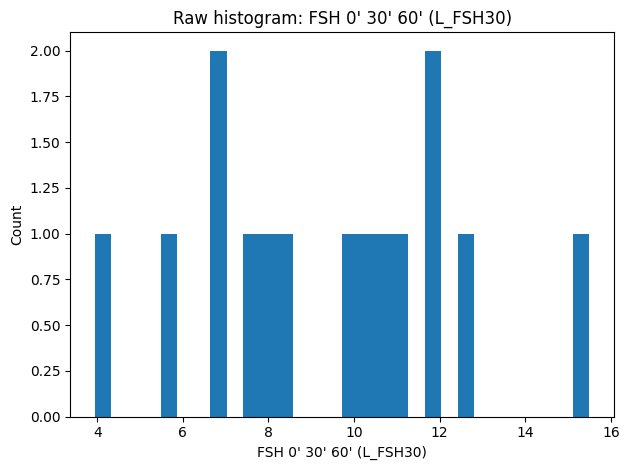

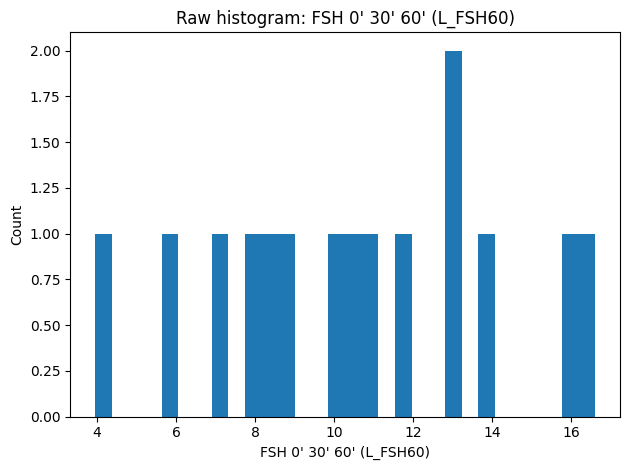

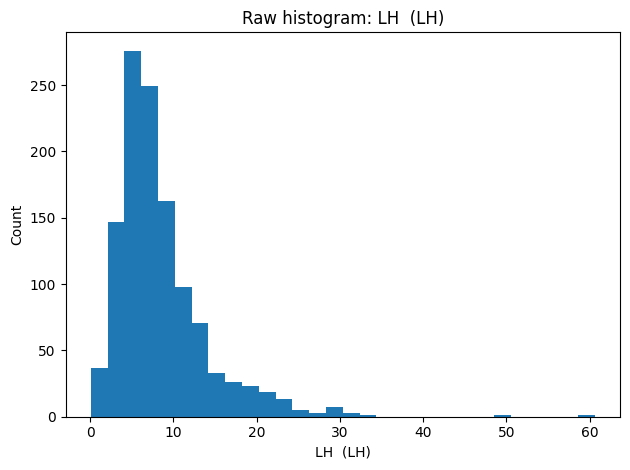

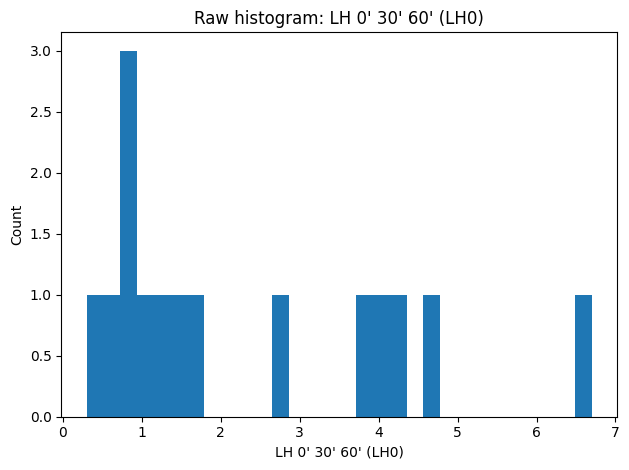

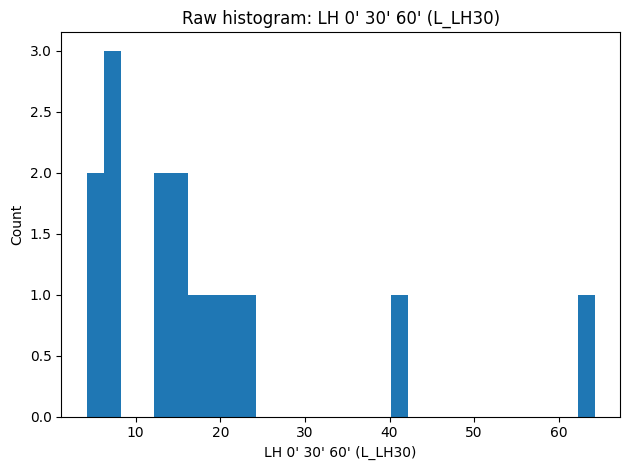

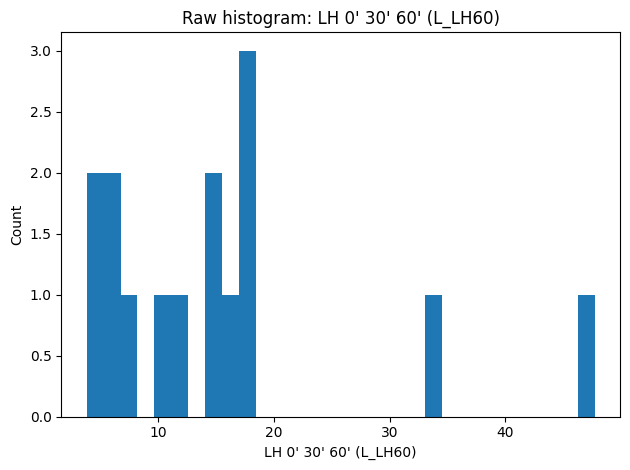

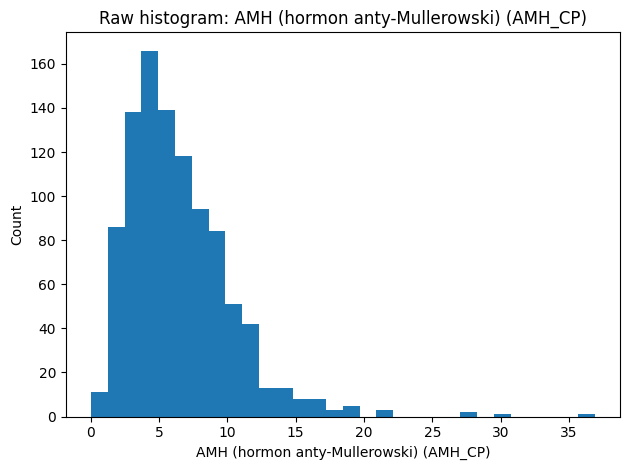

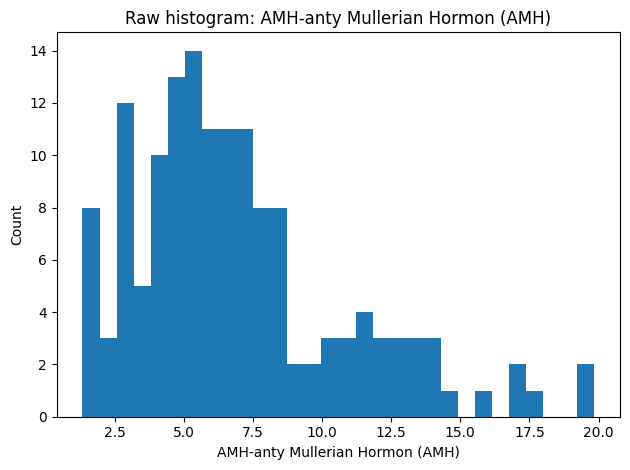

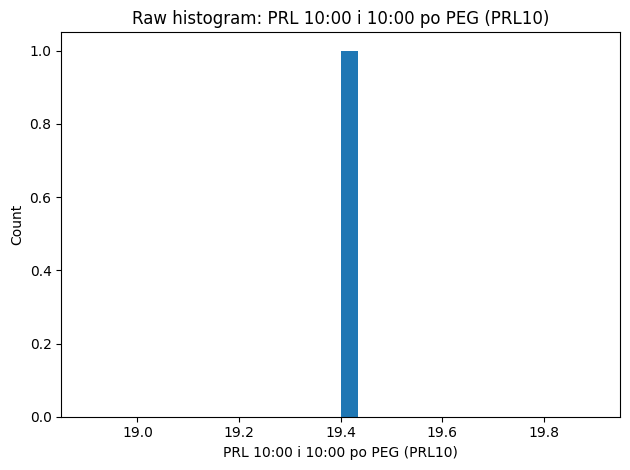

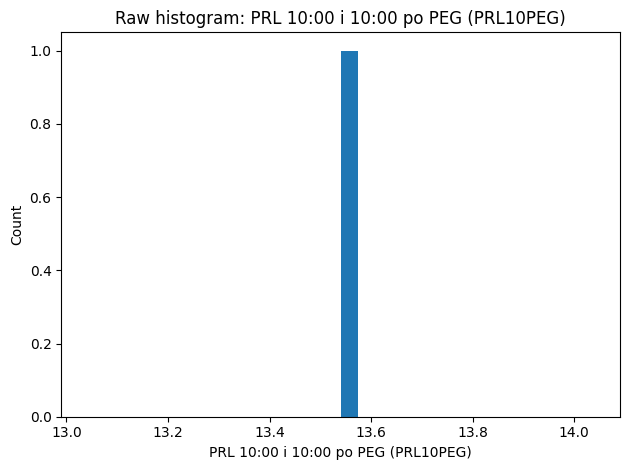

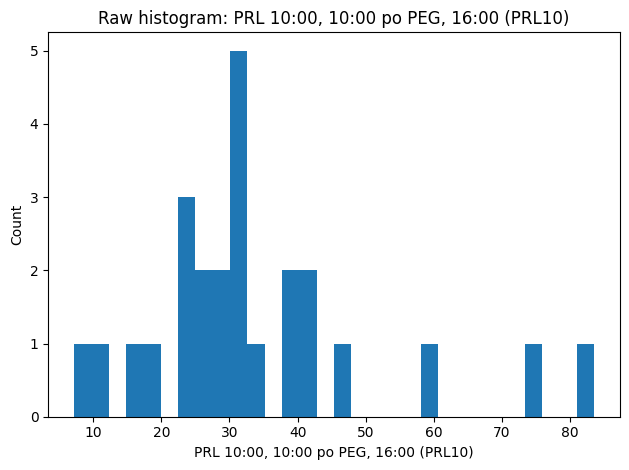

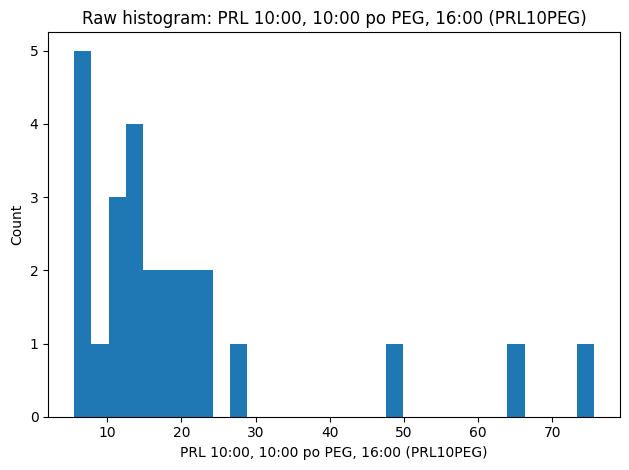

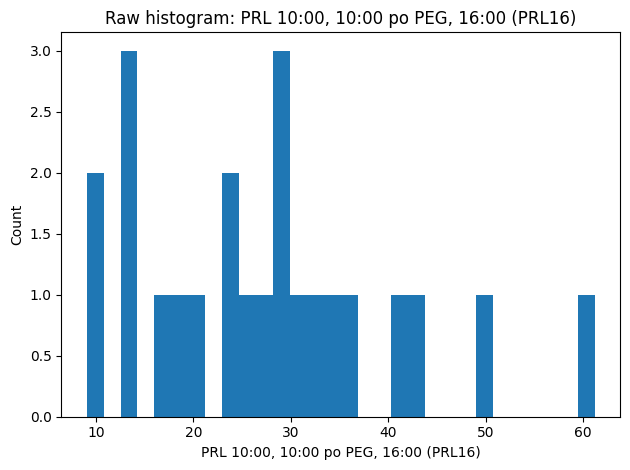

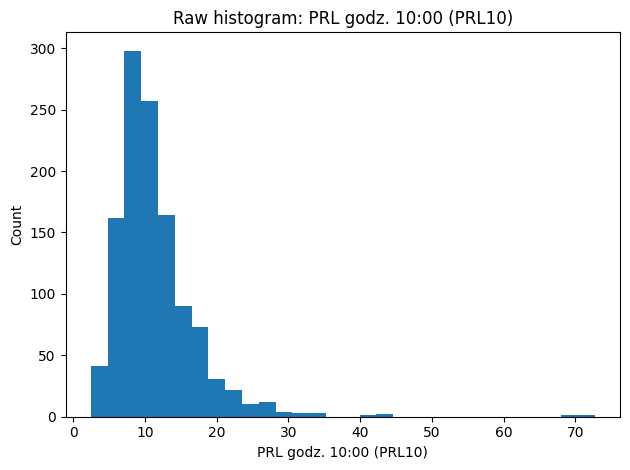

In [ ]:
hormone_raw_vars = sum([found[k] for k in ["Testosteron","DHEAS","Androstendion","SHBG","FSH","LH","AMH","PRL 10:00"]], [])
hormone_raw_vars = [c for c in hormone_raw_vars if c in df_raw.columns]

for c in hormone_raw_vars:
    s = pd.to_numeric(df_raw[c].astype(str).str.replace(",", ".", regex=False).str.replace(r"[<> ]","", regex=True), errors="coerce")
    plt.figure()
    plt.hist(s.dropna(), bins=30)
    plt.title(f"Raw histogram: {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## Distributions of CBC 5-Diff variables (raw)

Focus was placed on the 5-Diff panel, as it contains the majority of CBC data.


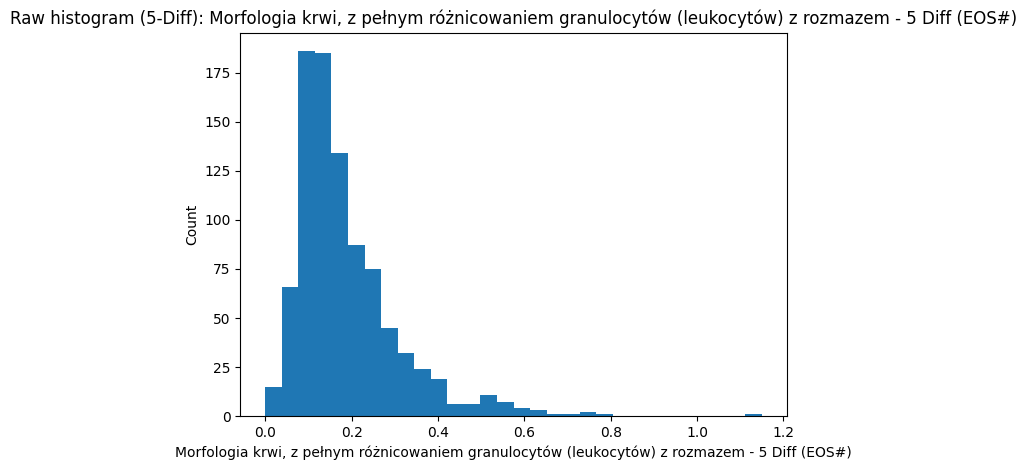

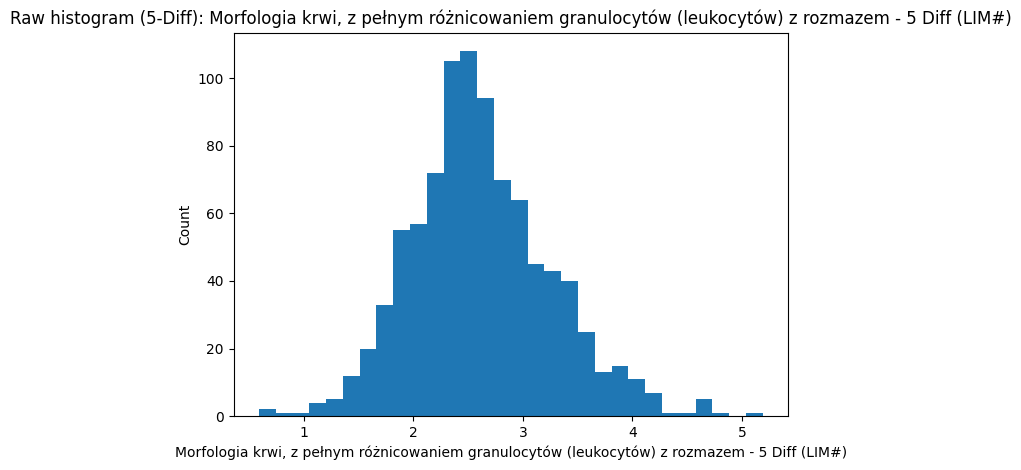

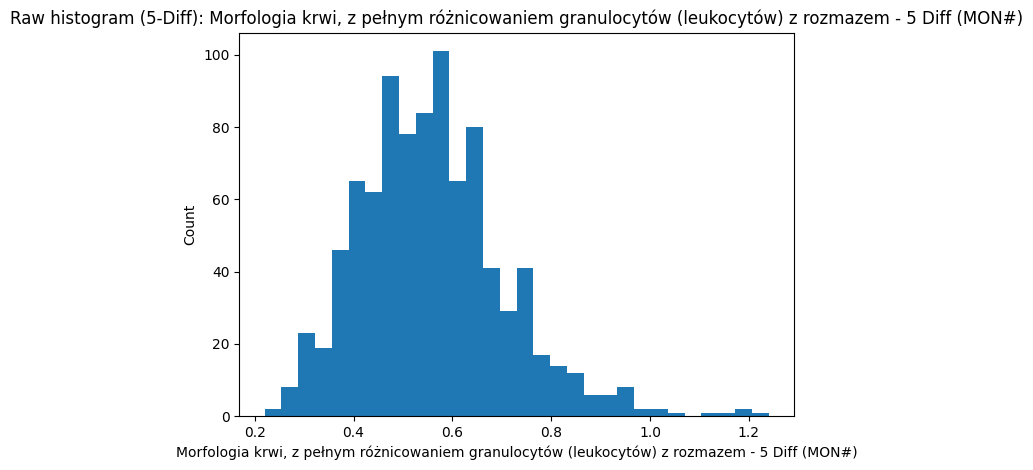

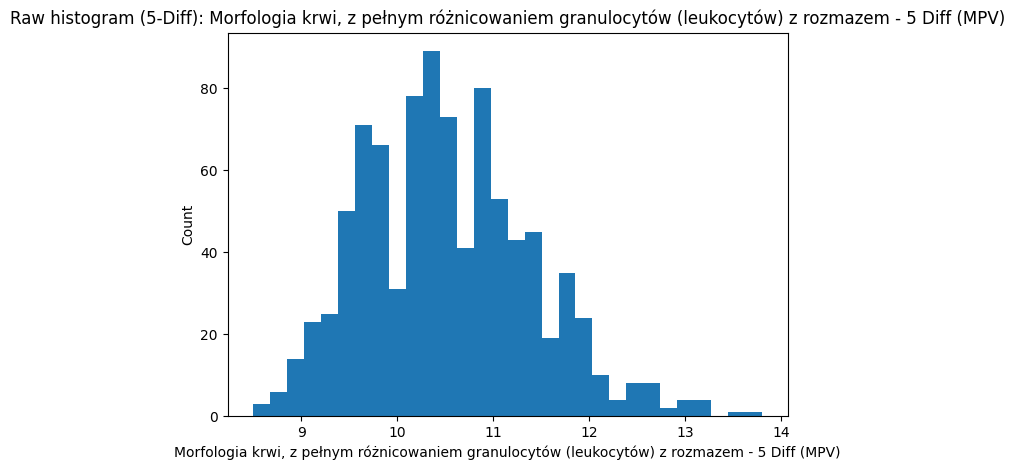

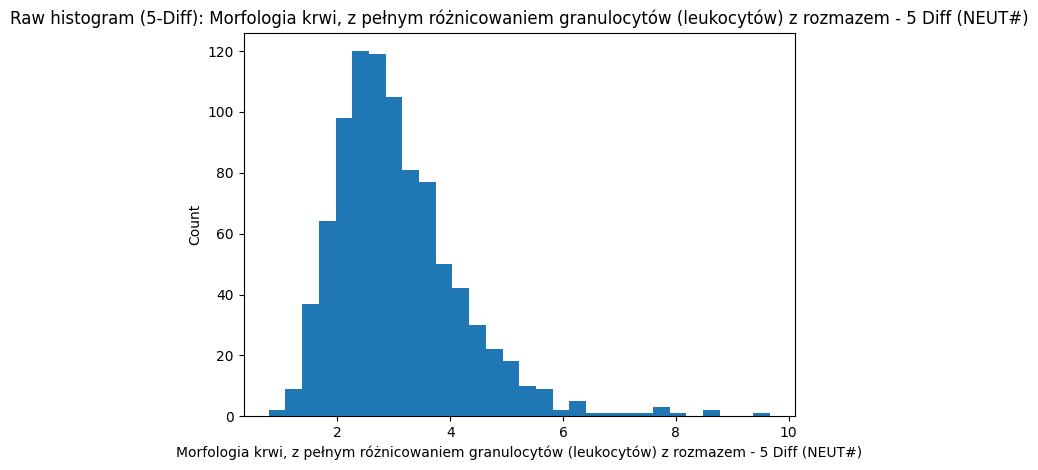

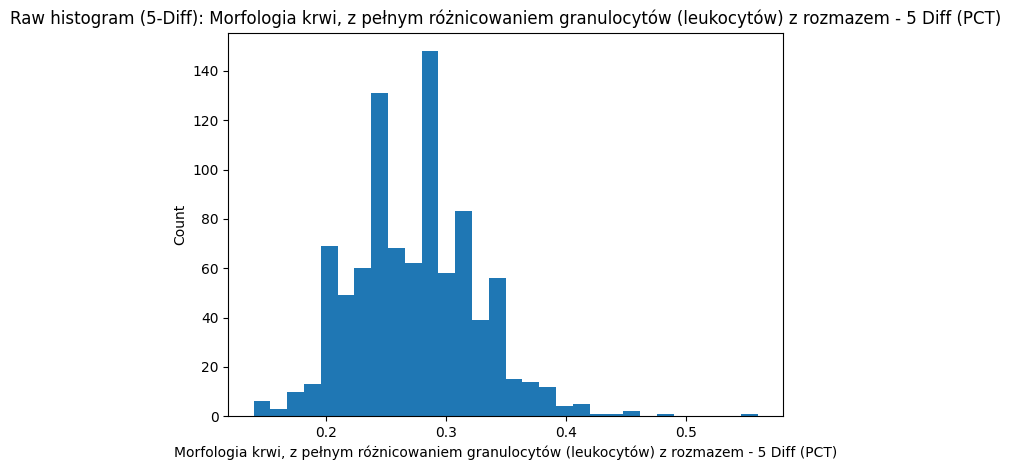

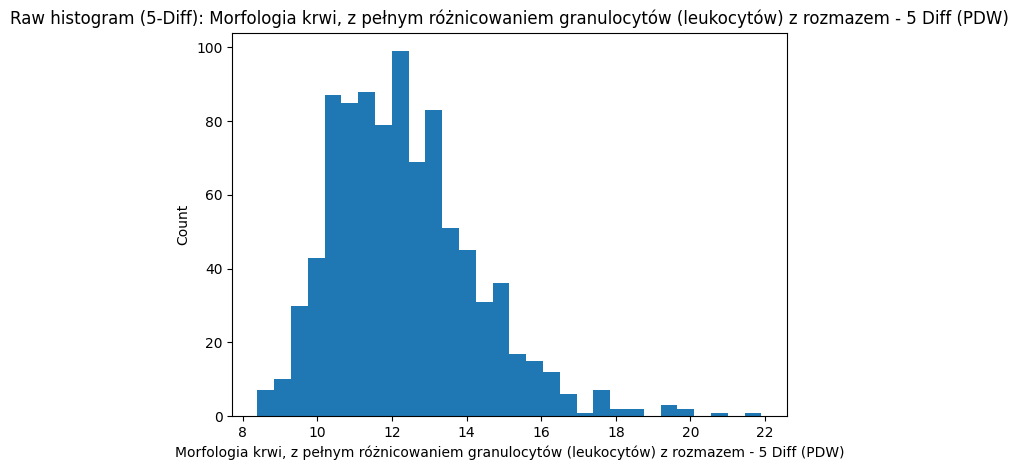

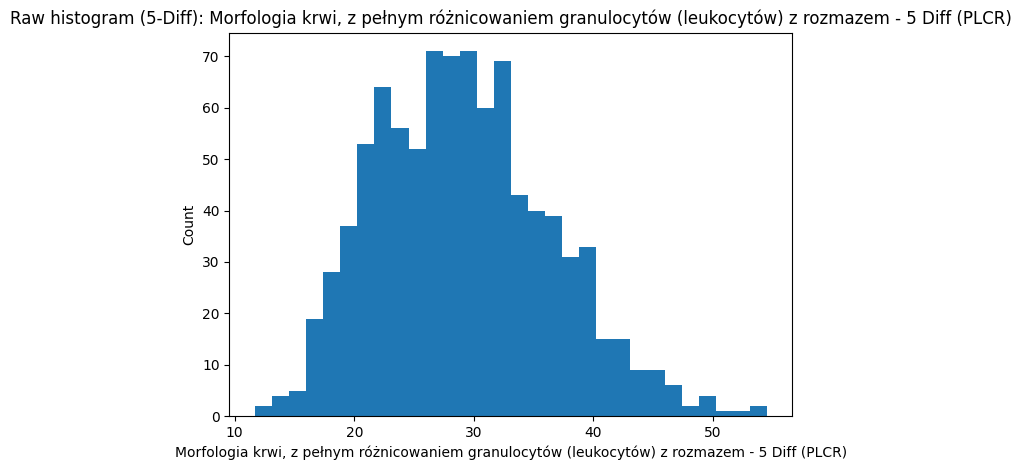

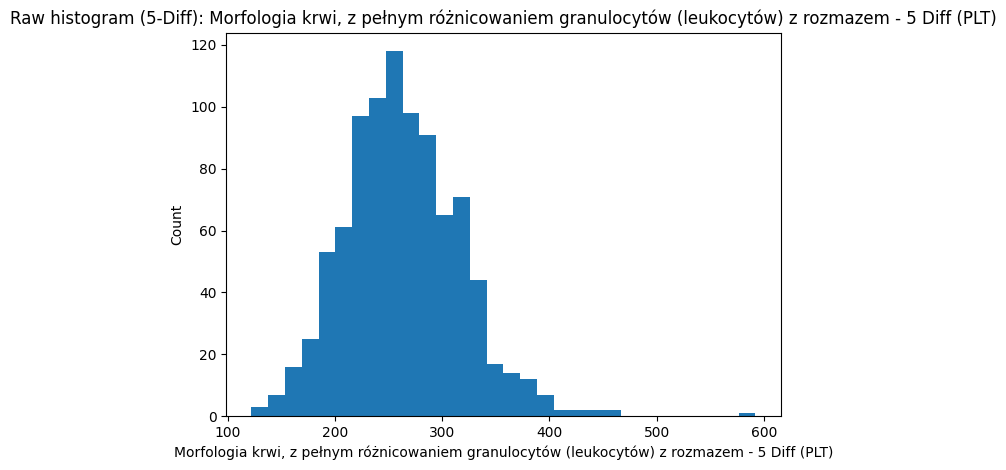

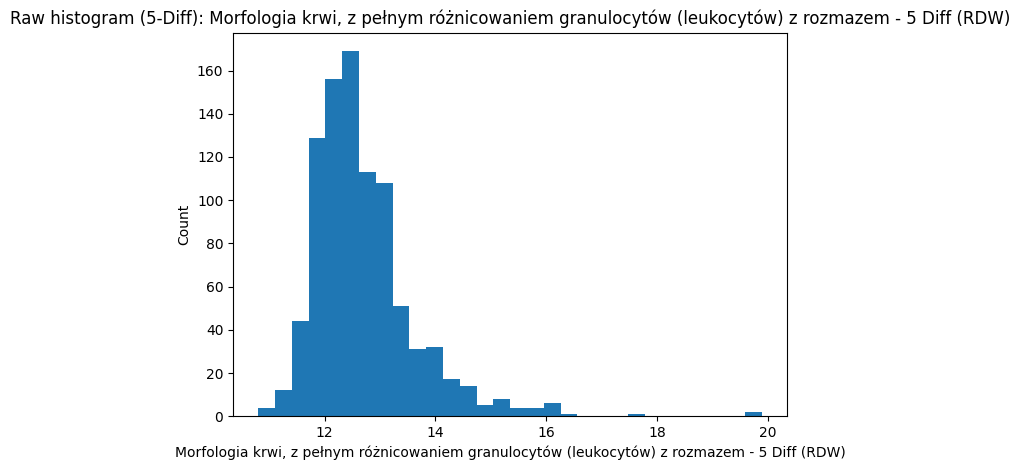

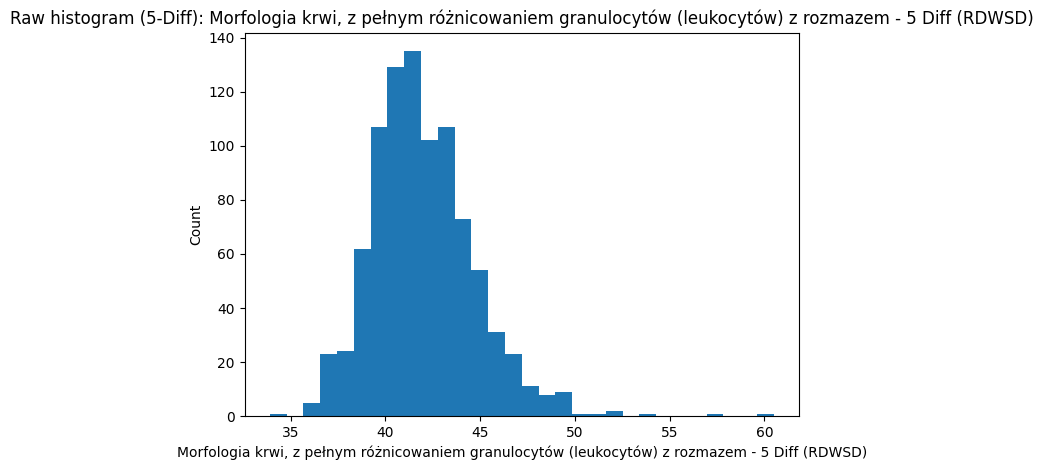

In [ ]:
cbc5_raw_vars = found["CBC 5-Diff"]
cbc5_raw_vars = [c for c in cbc5_raw_vars if c in df_raw.columns]


cbc5_plot_vars = [c for c in cbc5_raw_vars if re.search(r"PLT|MPV|RDW|LIM#|NEUT#|MON#|EOS#|PDW|PCT|PLCR", c)]
cbc5_plot_vars = cbc5_plot_vars[:12]

for c in cbc5_plot_vars:
    s = pd.to_numeric(df_raw[c].astype(str).str.replace(",", ".", regex=False).str.replace(r"[<> ]","", regex=True), errors="coerce")
    plt.figure()
    plt.hist(s.dropna(), bins=30)
    plt.title(f"Raw histogram (5-Diff): {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## Outliners

## Preliminary Outlier Screening

Outliers were assessed visually using distributional plots (histograms and boxplots) and descriptively using extreme percentile thresholds.

No automatic removal was performed at this stage.

Formal outlier handling decisions (e.g., winsorization or exclusion of implausible values) will be documented in Notebook 02.


## Distribution of variables

## Distributional Assessment

Continuous variables were inspected for:

- Skewness
- Extreme values
- Potential need for logarithmic transformation

This step informs the specification of parametric models in subsequent analyses.


## Correlation preview (raw, exploratory only)

A very limited exploratory Spearman correlation preview on raw data was conducted for primary relationships to verify the expected direction of effects.
Full inferential analyses were carried out in notebook 03.


In [ ]:

preview_map = {
    "Testosteron": found["Testosteron"][0] if found["Testosteron"] else None,
    "FAI_parts_T": found["Testosteron"][0] if found["Testosteron"] else None,
    "SHBG": found["SHBG"][0] if found["SHBG"] else None,
    "NEUT#": next((c for c in cbc5_raw_vars if "(NEUT#)" in c), None),
    "LIM#": next((c for c in cbc5_raw_vars if "(LIM#)" in c), None),
    "PLT": next((c for c in cbc5_raw_vars if "(PLT)" in c), None),
    "MPV": next((c for c in cbc5_raw_vars if "(MPV)" in c), None),
}

preview_map


{'Testosteron': 'Testosteron (L_TESTOS)',
 'FAI_parts_T': 'Testosteron (L_TESTOS)',
 'SHBG': 'SHBG (L_SHGB)',
 'NEUT#': 'Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (NEUT#)',
 'LIM#': 'Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (LIM#)',
 'PLT': 'Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (PLT)',
 'MPV': 'Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (MPV)'}

In [ ]:
def parse_raw_num(s):
    return pd.to_numeric(
        s.astype(str)
         .str.replace(",", ".", regex=False)
         .str.replace(r"[<> ]","", regex=True),
        errors="coerce"
    )



unique_preview_raw_cols = list(dict.fromkeys(v for v in preview_map.values() if v is not None))
df_prev = df_raw[unique_preview_raw_cols].copy()
for c in unique_preview_raw_cols:
    df_prev[c] = parse_raw_num(df_prev[c])

df_prev.corr(method="spearman")

,Testosteron (L_TESTOS),SHBG (L_SHGB),"Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (NEUT#)","Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (LIM#)","Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (PLT)","Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (MPV)"
Testosteron (L_TESTOS),1.0000,-0.1710,0.1667,0.1490,0.1473,-0.0073
SHBG (L_SHGB),-0.1710,1.0000,-0.3831,-0.1771,-0.2278,0.0475
"Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (NEUT#)",0.1667,-0.3831,1.0000,0.2041,0.3578,-0.0155
"Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (LIM#)",0.1490,-0.1771,0.2041,1.0000,0.2501,-0.0292
"Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (PLT)",0.1473,-0.2278,0.3578,0.2501,1.0000,-0.3853
"Morfologia krwi, z pełnym różnicowaniem granulocytów (leukocytów) z rozmazem - 5 Diff (MPV)",-0.0073,0.0475,-0.0155,-0.0292,-0.3853,1.0000


# EDA Conclusions

1. Dataset integrity was confirmed.
2. Missingness was quantified and documented.
3. Key hormonal and hematologic variables were identified.
4. No structural anomalies preventing analysis were detected.

All preprocessing decisions informed by this notebook are implemented in:
→ 02_cleaning_and_transformation.ipynb

This notebook serves as a transparent record of data exploration prior to hypothesis testing.

